In [1]:
import edoxrd as xrd
import peakutils as pk
import edoxrd as xrd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, fixed

%matplotlib inline

/users/zatterin/Envs/py2/local/lib/python2.7/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [2]:
data_dir = '/users/zatterin/Documents/data/XRD/'

In [16]:
tot_samples = !ls {data_dir} | grep e1
for sample in tot_samples: print(sample),

e16006 e16014 e16018 e16019 e16020 e16020E e16037 e16043 e16046 e16048 e16050 e16051 e16052 e16054 e16056 e16061 e16065 e16088 e16089 e16090 e16095 e16109 e16111 e16122 e17001 e17002 e17004


In [65]:
# sample_list = ['e16014','e16018','e16019','e16020','e16088','e16089','e17002','e16095']
sample_list = ['e17002','e16019','e16014','e16089','e16018','e16088',\
               'e16020','e16095'] # put it in correct thickness order please!

**you have to plot the diff between the sub and film peak you idiot!**

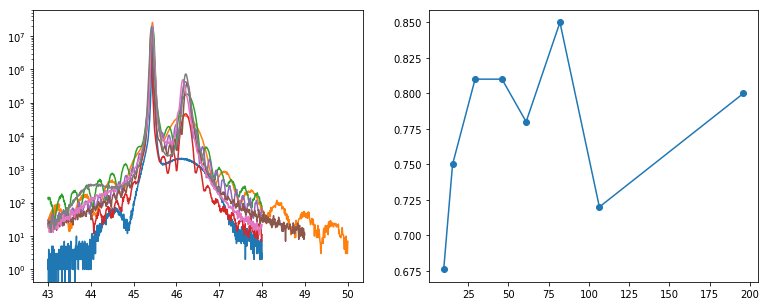

In [71]:
theta_peaks = []
sample_thickness = [9.8,15.3,29.3,46,61,82,106.5,196] # manual input from excel file
fig = plt.figure(figsize=(13,5))
for sample_name in sample_list:
    temp = !ls {data_dir + sample_name} | grep ras | grep '002' | grep t2t
    if len(temp) != 1:
        scan = temp[1]
    else:
        scan = temp[0]
    
    theta, I = xrd.read_data(scan,data_dir+sample_name+'/')
    plt.subplot(121)
    plt.plot(theta, I);plt.yscale('log')
    # peak positions
    idxs = pk.indexes(I, thres=1e-4, min_dist=1) # idexes of peaks
    sub_peak = I[idxs].argsort()[::-1][0] # index of sub peak
    film_peak = I[idxs].argsort()[::-1][1] # index of film peak
    theta_film = theta[idxs[film_peak]] # theta of film peak
    theta_sub = theta[idxs[sub_peak]] # theta of sub peak
    delta_theta = theta_film - theta_sub # diff between the above
    theta_peaks.append(delta_theta)
    
plt.subplot(122)
plt.plot(sample_thickness,theta_peaks,'-o');